In [1]:
#importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
#loading the algerian_forest dataset into data frame using pandas
df = pd.read_csv("C:/Users/Sarthak Aggarwal/Downloads/Flare-Scan-main (1)/Flare-Scan-main/FWI_Predictor_ML/dataset/Algerian_forest_fires_cleaned_dataset.csv")

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.drop(["day","month","year","Region"],inplace=True,axis=1)

In [8]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 21.0+ KB


In [10]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [11]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [12]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()

In [13]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [14]:
X = df.drop(["FWI","Classes"],axis = 1)
y  = df["FWI"]
z = df["Classes"]

In [15]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9
...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1


# FWI

In [16]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 9), (61, 9), (182,), (61,))

In [18]:
#Feature selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000


In [19]:
def correlation(dataset,threshold):
    col_cor = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            if abs(corr_matrix.iloc[i,j])>threshold and abs(corr_matrix.iloc[i,j])!=1 :
                col_name  = corr_matrix.columns[i]
                col_cor.add(col_name)
    return col_cor

In [20]:
#threshold--Domain expertise
correlation(X_train,0.85)

{'BUI', 'DC', 'DMC'}

In [21]:
X_train.drop(["BUI","DC"],axis = 1,inplace = True)
X_test.drop(["BUI","DC"],axis = 1,inplace = True)
X_train.shape,X_test.shape

((182, 7), (61, 7))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.12805583,
        -0.88272888, -0.62963326],
       [-0.30175842,  0.64950844, -0.59874754, ..., -1.21758569,
        -0.86687565, -0.93058524],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  1.15703067,
         0.61540157,  2.7271388 ],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -2.20933724,
        -1.06504105, -1.06948615],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.73099656,
         0.37760309,  0.5973248 ],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.33631651,
        -1.01748135, -0.86113478]])

Text(0.5, 1.0, 'X_train after scaling')

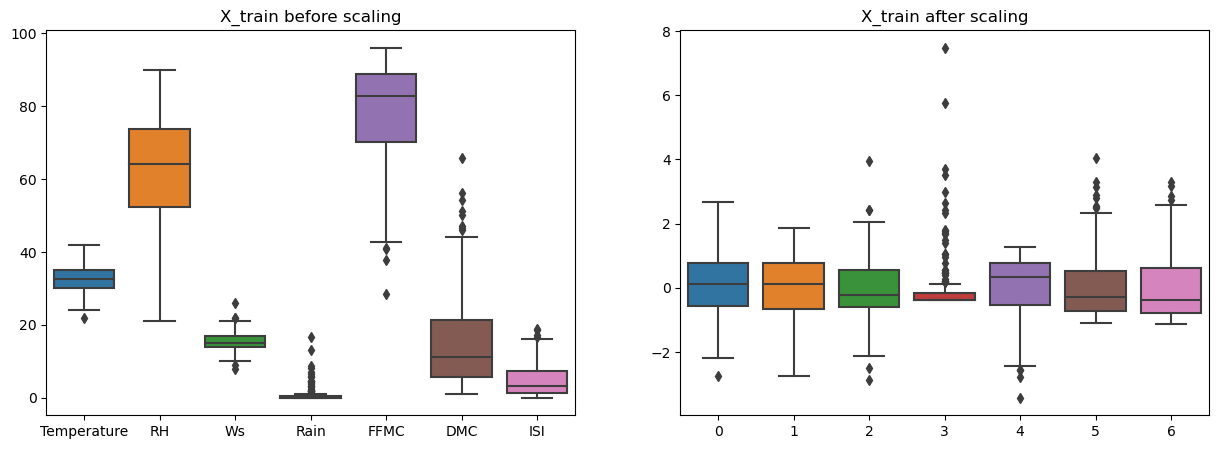

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

Mean Absolute Error 0.5920294522702588
R2 Score 0.9804976435240779


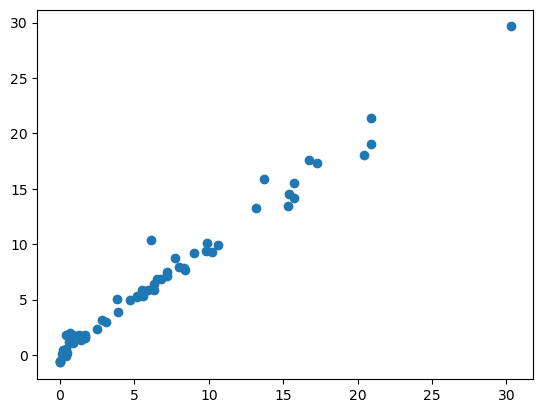

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error 1.1331759949144087
R2 Score 0.9492020263112388


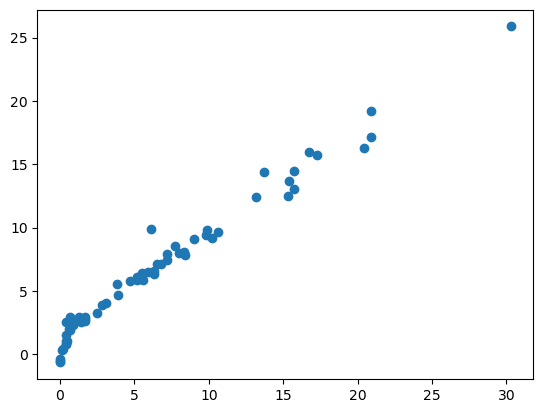

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error 0.8264308494715196
R2 Score 0.9710414687002776


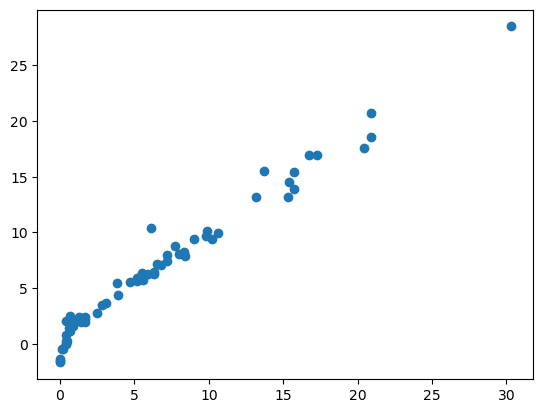

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6100778376158285
R2 Score 0.9798296003877377


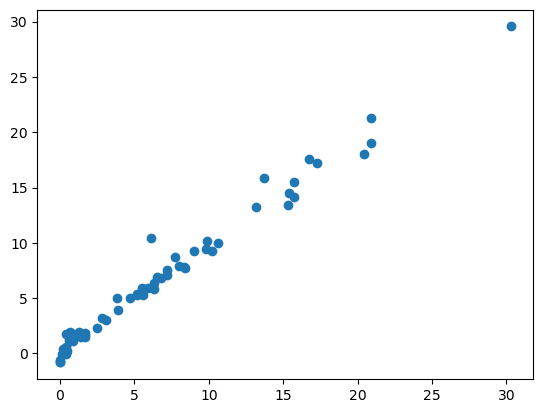

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)